# Indian Liver Patient Records
Patient records collected from North East of Andhra Pradesh, India

[Source](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset)

## About Dataset

### Context
Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

Columns:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease 1, or no disease 2)

## Reading data

In [1]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [2]:
#Read the training & test data
liver_df = pd.read_csv('indian_liver_patient.csv')
liver_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


## Data Analysis

In [3]:
liver_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
# Describe gives statistical information about NUMERICAL columns in the dataset
liver_df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
# Check for any null values
liver_df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
liver_df.dropna(subset=['Albumin_and_Globulin_Ratio'], inplace=True) #Dropping the null values from the AGR column

## Feature selection

Number of patients diagnosed with liver disease:  414
Number of patients not diagnosed with liver disease:  165


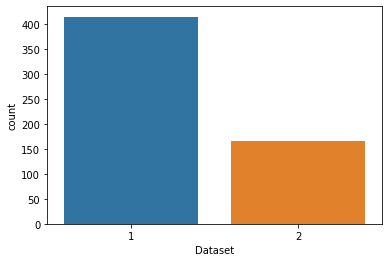

In [7]:
sns.countplot(data=liver_df, x = 'Dataset', label='Count')

LD, NLD = liver_df['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

Number of patients that are male:  439
Number of patients that are female:  140


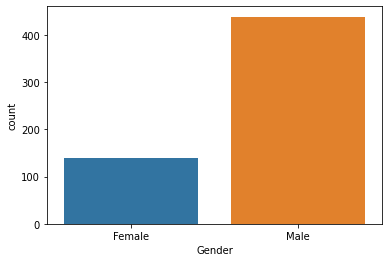

In [8]:
sns.countplot(data=liver_df, x = 'Gender', label='Count')

M, F = liver_df['Gender'].value_counts()
print('Number of patients that are male: ',M)
print('Number of patients that are female: ',F)

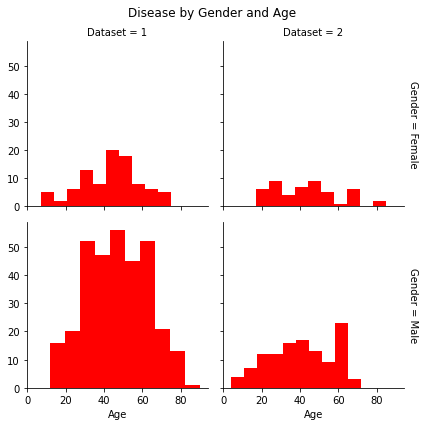

In [9]:
g = sns.FacetGrid(liver_df, col="Dataset", row="Gender", margin_titles=True)
g.map(plt.hist, "Age", color="red")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Disease by Gender and Age');

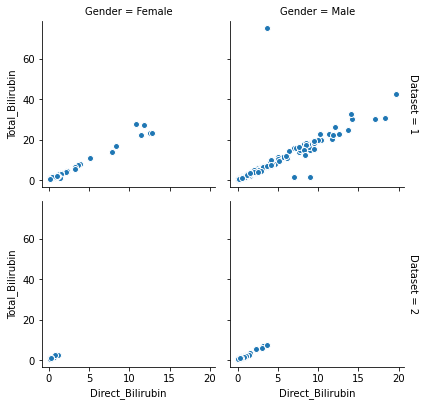

In [10]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Direct_Bilirubin", "Total_Bilirubin", edgecolor="w")
plt.subplots_adjust(top=0.9)

There seems to be direct relationship between Total_Bilirubin and Direct_Bilirubin. We have the possibility of removing one of this feature.

c:\Users\dranh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


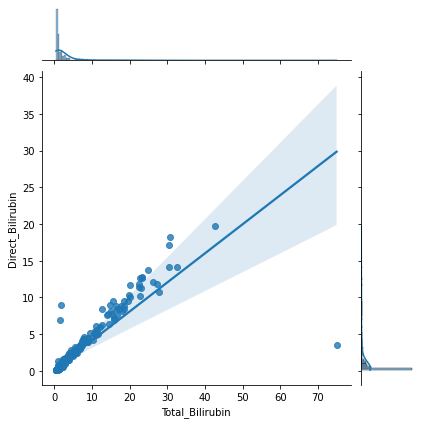

In [11]:
sns.jointplot(x="Total_Bilirubin", y="Direct_Bilirubin", data=liver_df, kind="reg")

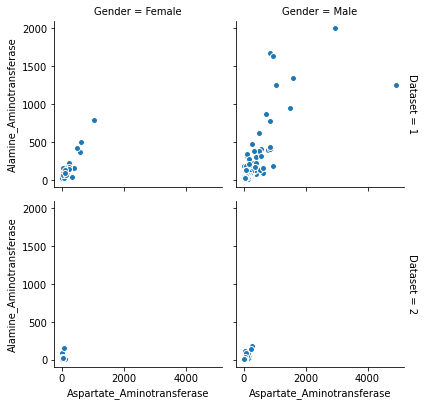

In [12]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Aspartate_Aminotransferase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

There is linear relationship between Aspartate_Aminotransferase and Alamine_Aminotransferase and the gender. We have the possibility of removing one of this feature.

c:\Users\dranh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


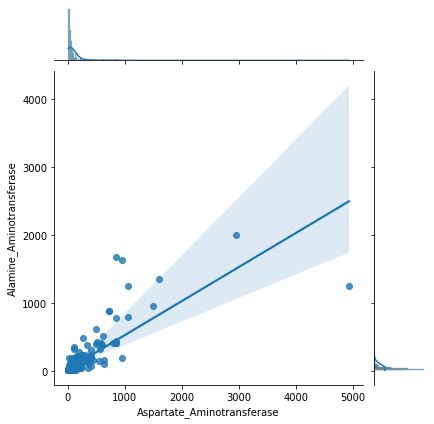

In [13]:
sns.jointplot(x="Aspartate_Aminotransferase", y="Alamine_Aminotransferase", data=liver_df, kind="reg")

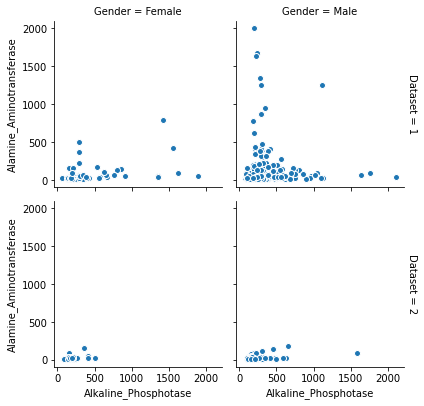

In [14]:
g = sns.FacetGrid(liver_df, col="Gender", row="Dataset", margin_titles=True)
g.map(plt.scatter,"Alkaline_Phosphotase", "Alamine_Aminotransferase",  edgecolor="w")
plt.subplots_adjust(top=0.9)

<Axes: >

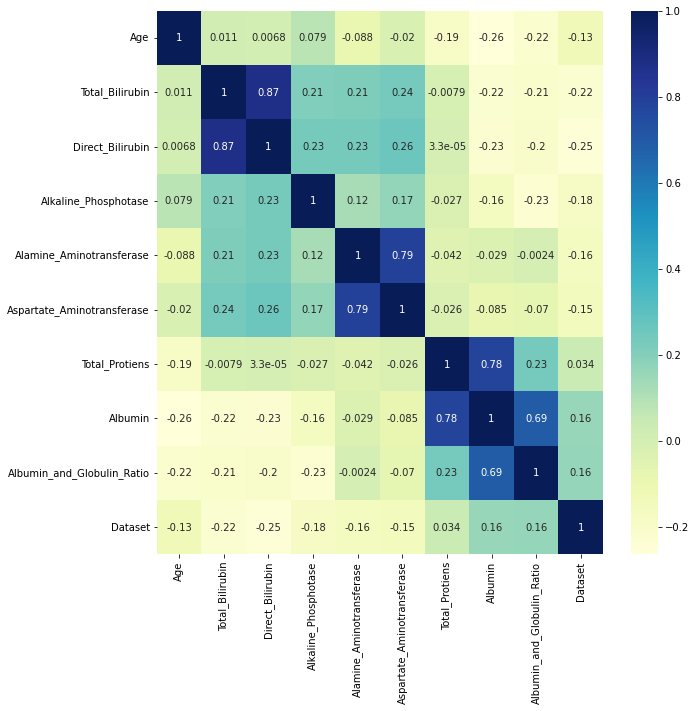

In [15]:
# Assuming liver_df is your DataFrame
numeric_columns = liver_df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(10, 10))
sns.heatmap(liver_df[numeric_columns].corr(), annot=True, cmap="YlGnBu")

plt.show()

**The above correlation also indicates the following correlation**
- Total_Protiens & Albumin
- Alamine_Aminotransferase & Aspartate_Aminotransferase
- Direct_Bilirubin & Total_Bilirubin
- There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

In [16]:
liver_df = pd.get_dummies(liver_df, columns=['Gender']) # Convert categorical variable into dummy/indicator variables.
liver_df

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
578,60,0.5,0.1,500,20,34,5.9,1.6,0.37,2,0,1
579,40,0.6,0.1,98,35,31,6.0,3.2,1.10,1,0,1
580,52,0.8,0.2,245,48,49,6.4,3.2,1.00,1,0,1
581,31,1.3,0.5,184,29,32,6.8,3.4,1.00,1,0,1


In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Separate the features and the target variable
X = liver_df.drop('Dataset', axis=1)
y = liver_df['Dataset']

# Apply the chi-square test to select the top k features
k = 11  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the top k features
top_feature_indices = selector.get_support(indices=True)

# Get the names of the top k features
top_features = X.columns[top_feature_indices]

# Rank the attribute importance
attribute_importance = sorted(zip(top_features, selector.scores_[top_feature_indices]), key=lambda x: x[1], reverse=True)

# Print the attribute importance
for attribute, score in attribute_importance:
    print(f"{attribute}: {score}")


Aspartate_Aminotransferase: 10138.860197313144
Alamine_Aminotransferase: 6361.1419431131435
Alkaline_Phosphotase: 3956.690966596116
Total_Bilirubin: 327.9130583096611
Direct_Bilirubin: 186.11977639877733
Age: 60.22667707514468
Albumin: 2.9669361310179814
Gender_Female: 2.905184453227932
Albumin_and_Globulin_Ratio: 1.6588823142321967
Gender_Male: 0.9264825135578818
Total_Protiens: 0.11853481528961524


Selected features:
- Aspartate_Aminotransferase
- Alamine_Aminotransferase
- Alkaline_Phosphotase
- Total_Bilirubin
- Direct_Bilirubin
- Age

In [18]:
selected_features = ['Aspartate_Aminotransferase', 'Alamine_Aminotransferase', 'Alkaline_Phosphotase', 'Total_Bilirubin', 'Direct_Bilirubin', 'Age', 'Dataset']

# Access the selected features from the liver_df dataframe
selected_df = liver_df[selected_features]


## Machine Learning

In [19]:
from sklearn.model_selection import train_test_split

# Separate the features and the target variable
X = selected_df.drop('Dataset', axis=1)
y = selected_df['Dataset']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (463, 6) (463,)
Test set shape: (116, 6) (116,)


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

accuracies = {}

# Create an instance of the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=20, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracies['random_forest'] = accuracy_score(y_test, y_pred)
print("Random Forest accuracy:", accuracies['random_forest'])

Random Forest accuracy: 0.6206896551724138


In [21]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create an instance of the MLP Classifier
mlp_classifier = MLPClassifier(
    hidden_layer_sizes=(20, 10),  # Two hidden layers
    max_iter=10000, # Number of iters
    alpha=0.0001, # Regularization constant
    solver='sgd', # Stochastic Gradient Descent
    random_state=42, # Controls the randomness of the weights
    n_iter_no_change=100 # Number of iterations with no improvement to wait before stopping
    )

# Fit the classifier to the training data
mlp_classifier.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = mlp_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracies['MLP'] = accuracy_score(y_test, y_pred)
print("MLP accuracy:", accuracies['MLP'])

MLP accuracy: 0.6293103448275862


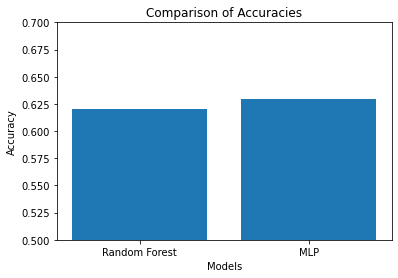

In [22]:
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ['Random Forest', 'MLP']
data = [accuracies['random_forest'], accuracies['MLP']]

# Plot the bar chart
plt.bar(models, data)
plt.xlabel('Models')
plt.ylim((0.5, 0.7))
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracies')
plt.show()
